<img src="https://media.defense.gov/2018/Sep/27/2002045438/-1/-1/0/180920-F-XXXXX-0001.JPG" alt="Employee Churn" width="600" height="600" style="display: block; margin: auto;">

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score

# Read Data

In [ ]:
df = pd.read_csv('/content/sample_data/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Drop Id Columns it has no impact on the data

In [ ]:
df.drop(['id'],axis=1,inplace=True)
df.shape #col-=1

(569, 31)

# EDA

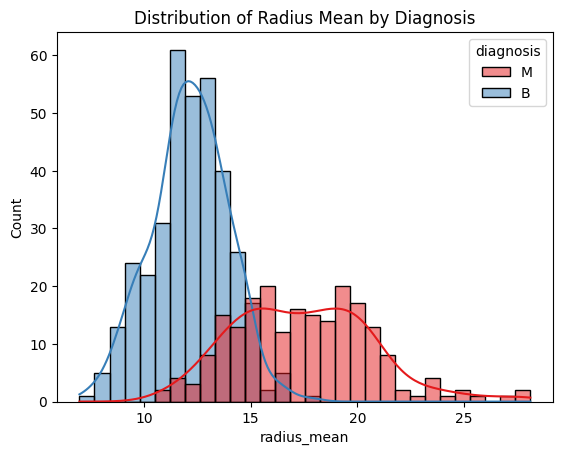

In [ ]:
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, palette='Set1', bins=30)
plt.title('Distribution of Radius Mean by Diagnosis')
plt.show()

Visualize pairwise relationships between multiple numerical features

<Figure size 1280x769 with 0 Axes>

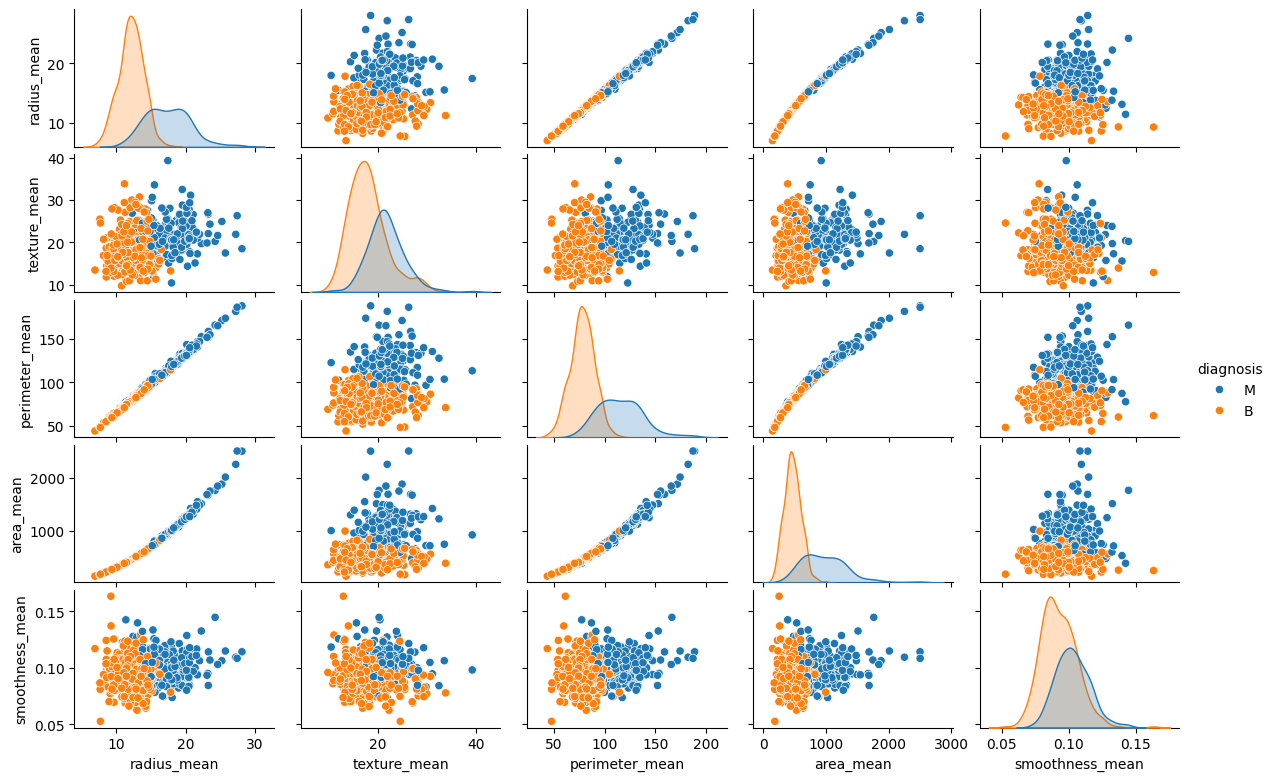

In [ ]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
# sns.pairplot(df[selected_features + ['diagnosis']], hue='diagnosis')
# plt.show()

# Set figure size
plt.figure(figsize=(12.8, 7.69))

# Create pairplot
plot = sns.pairplot(df[selected_features + ['diagnosis']], hue='diagnosis')

# Save image with specific size and DPI
plot.fig.set_size_inches(12.8, 7.69)
plot.fig.savefig("pairplot.png", dpi=100)

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

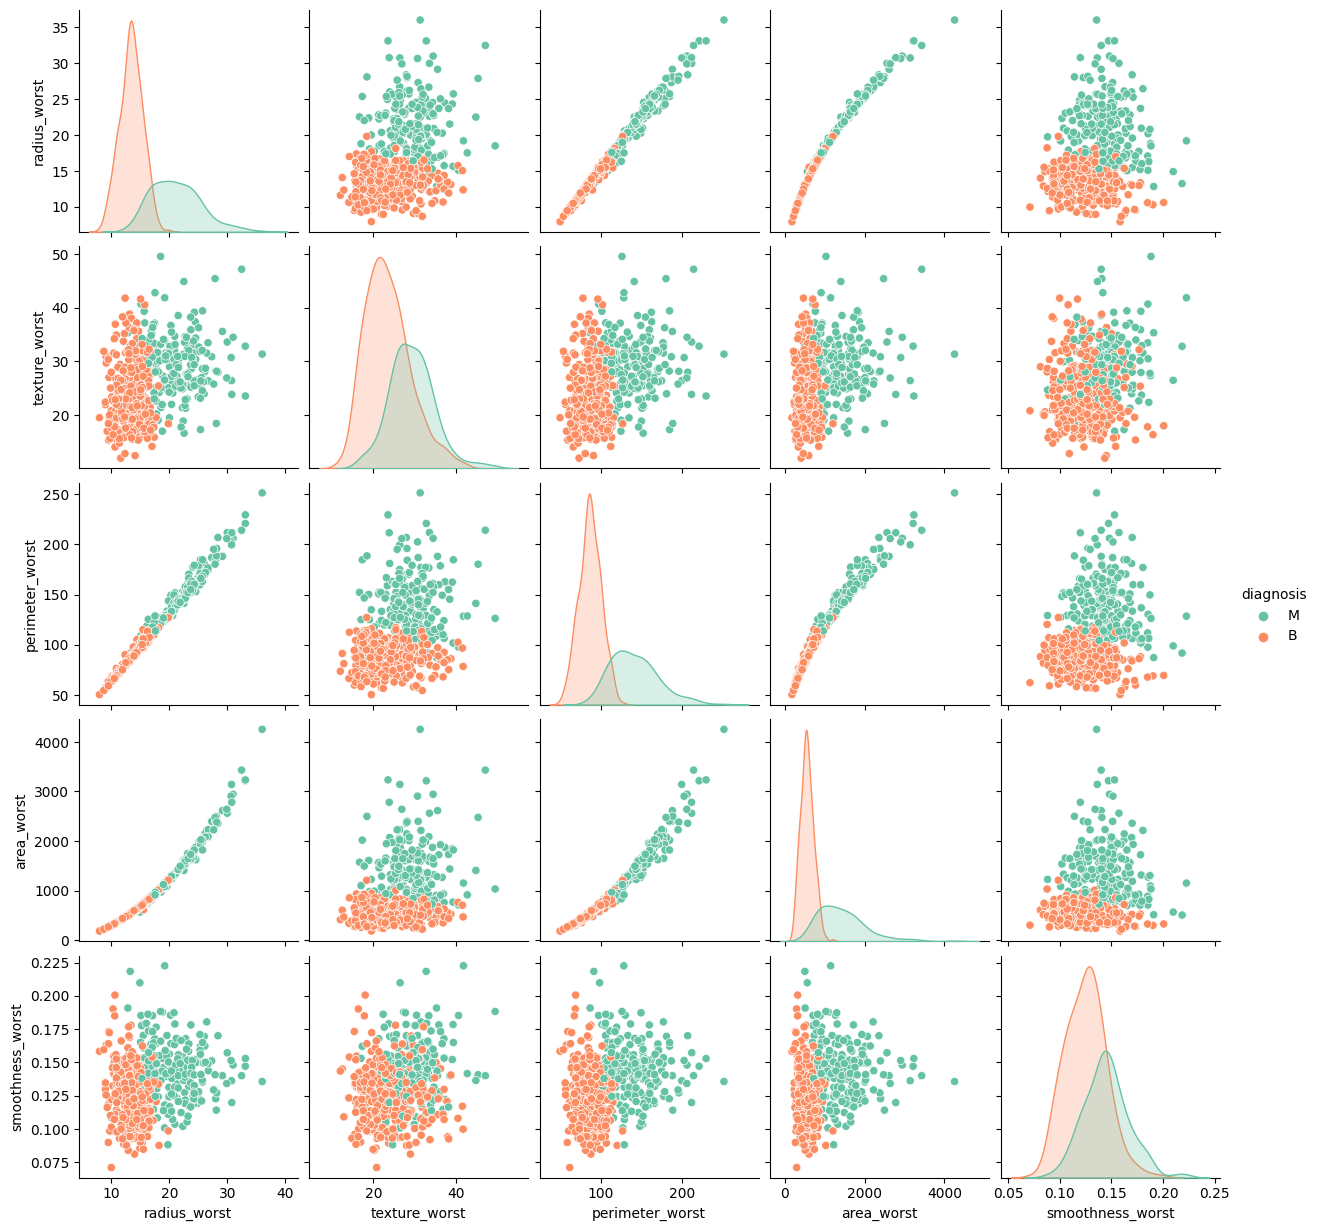

In [ ]:
selected_features = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']
sns.pairplot(df[selected_features + ['diagnosis']], hue='diagnosis', palette='Set2')
plt.show()

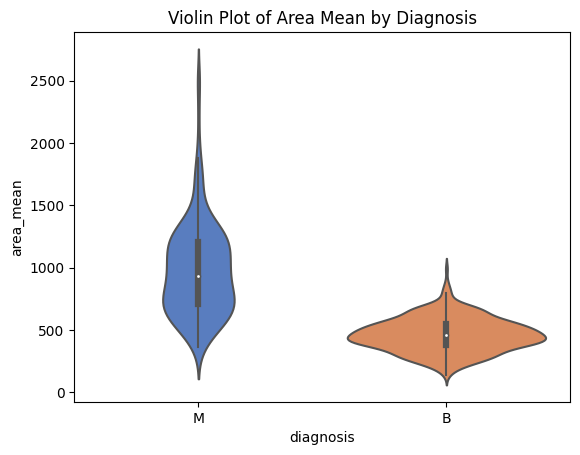

In [ ]:
sns.violinplot(x='diagnosis', y='area_mean', data=df, palette='muted')
plt.title('Violin Plot of Area Mean by Diagnosis')
plt.show()

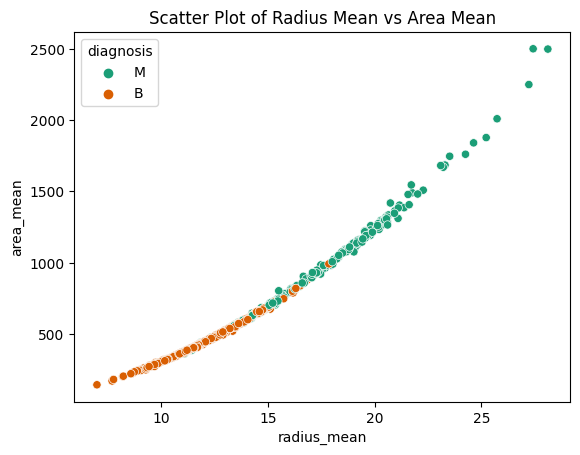

In [ ]:
sns.scatterplot(data=df, x='radius_mean', y='area_mean', hue='diagnosis', palette='Dark2')
plt.title('Scatter Plot of Radius Mean vs Area Mean')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


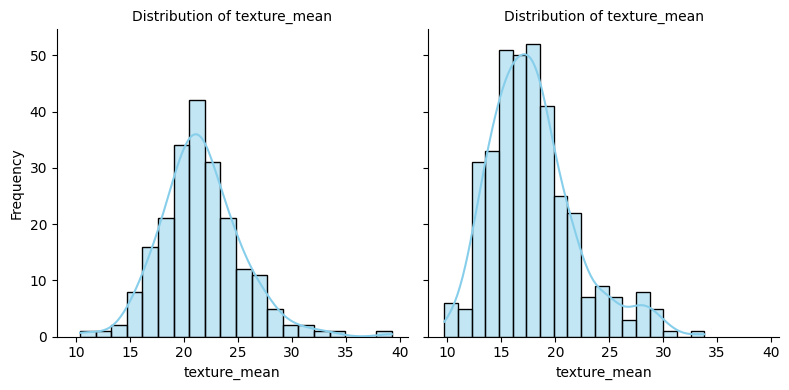

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


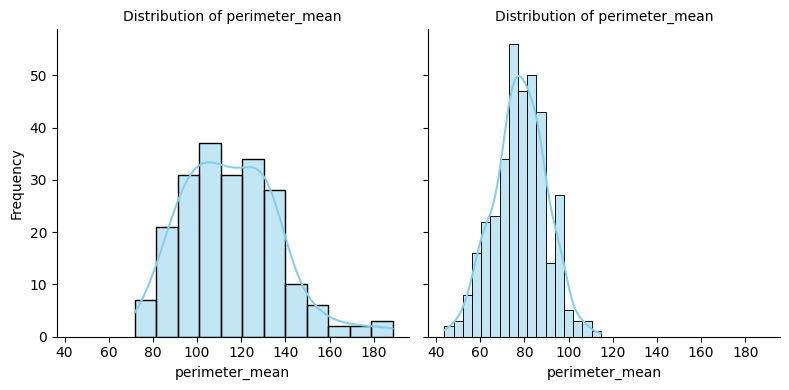

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


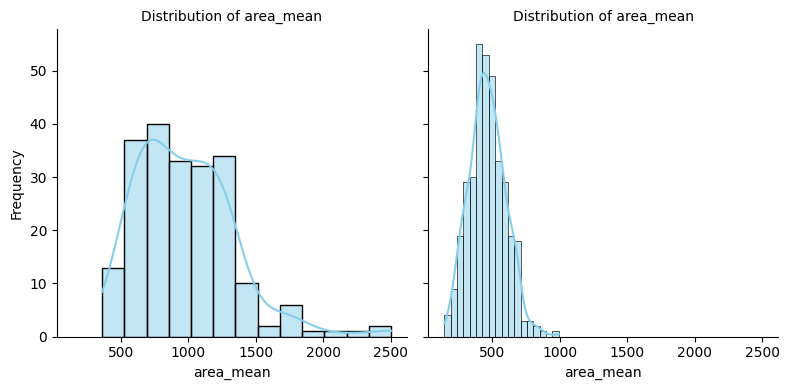

In [ ]:
from seaborn import FacetGrid
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['texture_mean', 'perimeter_mean', 'area_mean']

# Create FacetGrid for each feature
for feature in features:
    g = sns.FacetGrid(df, col='diagnosis', height=4, aspect=1)
    g.map(sns.histplot, feature, kde=True, color='skyblue')
    g.set_axis_labels(feature, 'Frequency')
    g.set_titles(f'Distribution of {feature}')
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


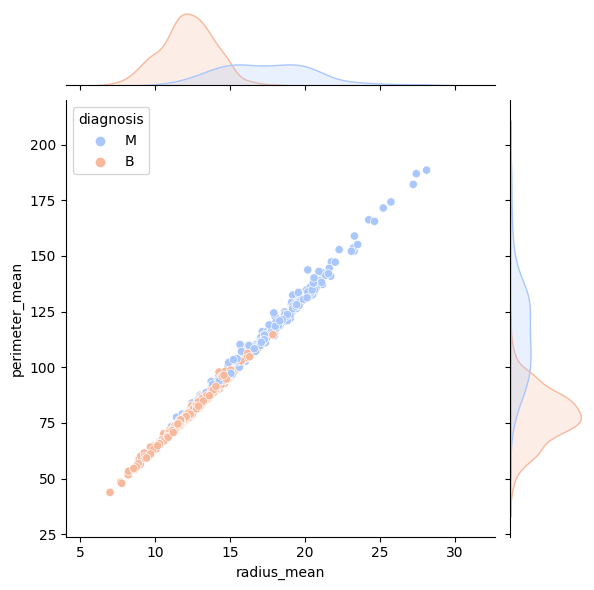

In [ ]:
sns.jointplot(data=df, x='radius_mean', y='perimeter_mean', hue='diagnosis', kind='scatter', palette='coolwarm')
plt.show()

Understand correlationships between numerical features

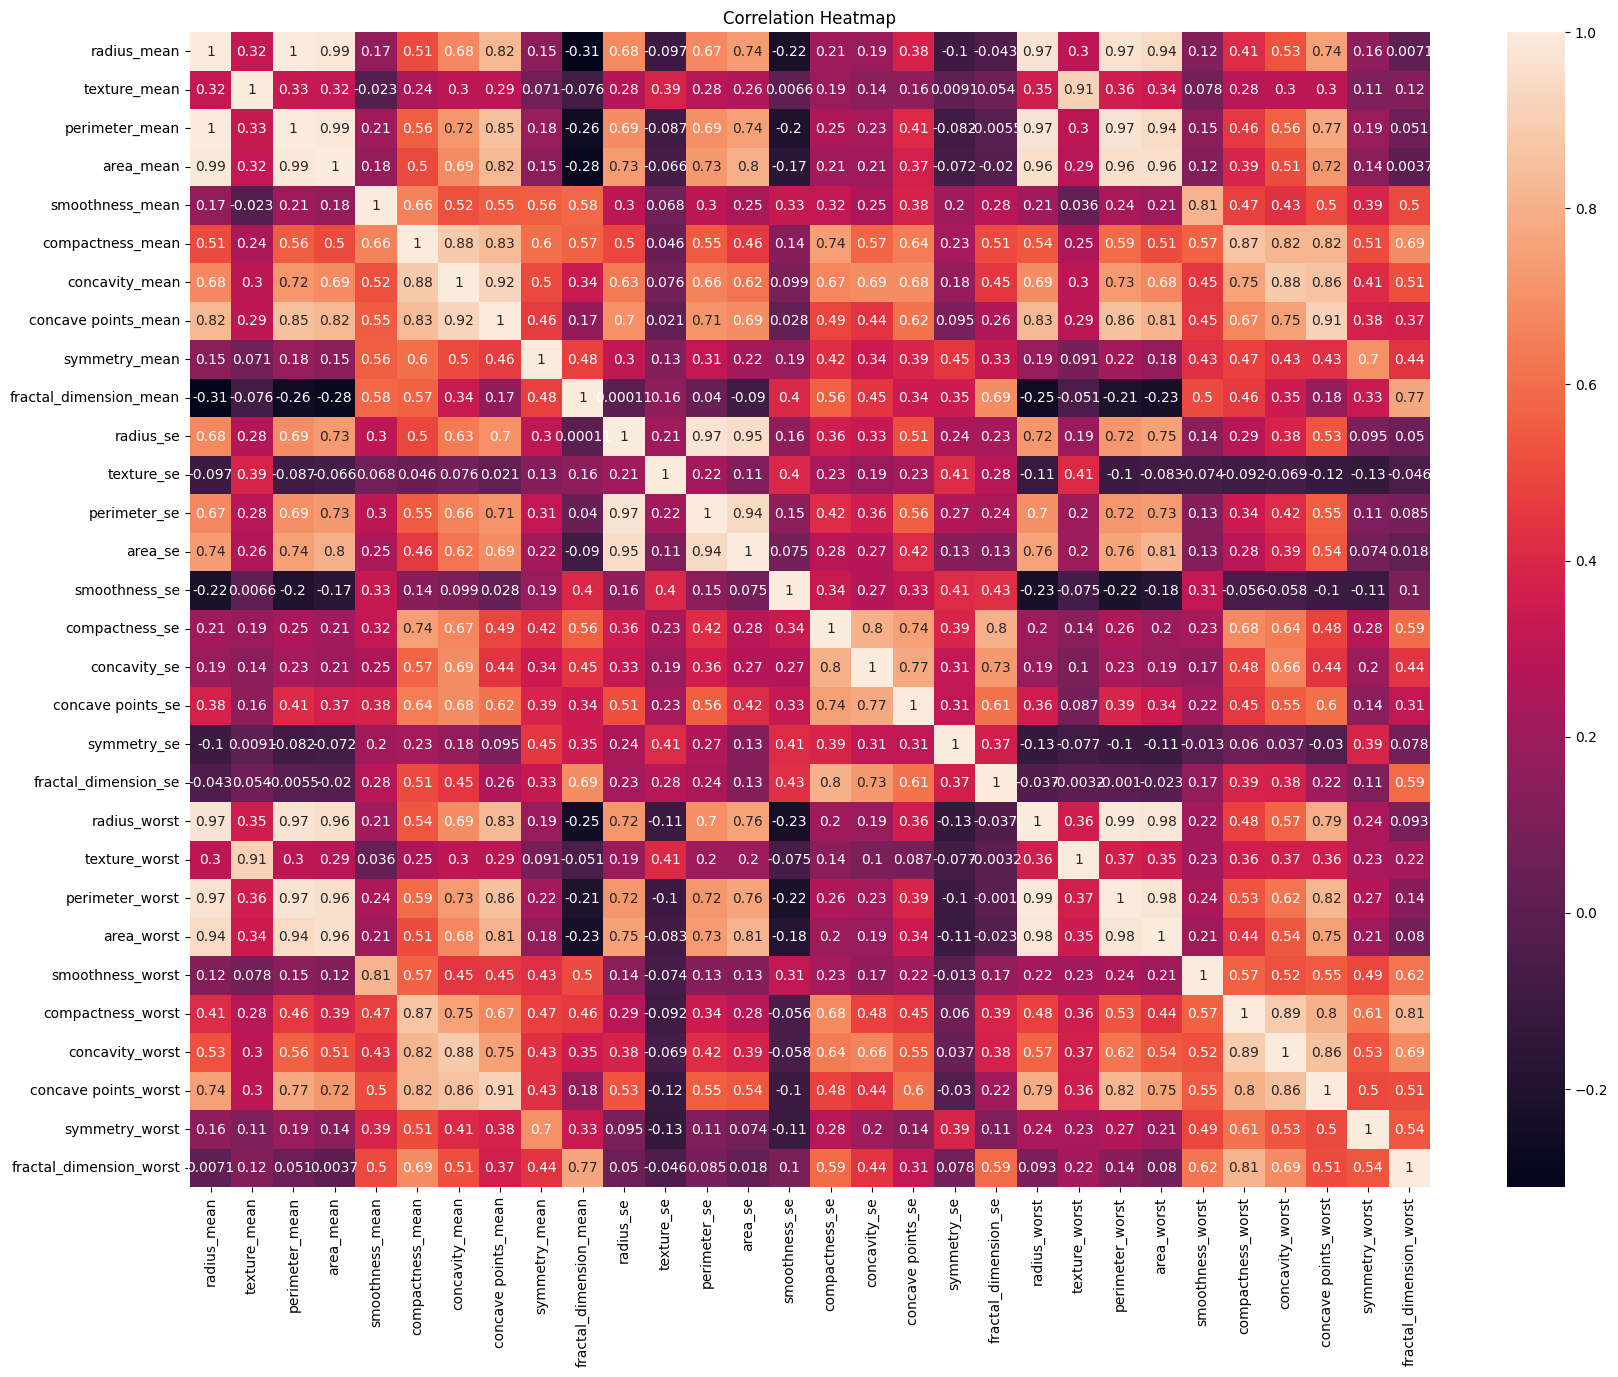

In [ ]:
import numpy as np
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlations
corr = numerical_df.corr()  # Exclude non-numerical columns
plt.figure(figsize=(20, 15))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

Print the high correlation between each two features

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])
corr = numerical_df.corr()

# Convert correlation matrix to a readable format
corr_pairs = corr.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])
corr = corr_pairs.sort_values(by='Correlation', ascending=False)
corr

,Feature 1,Feature 2,Correlation
2,radius_mean,perimeter_mean,0.997855
622,radius_worst,perimeter_worst,0.993708
3,radius_mean,area_mean,0.987357
63,perimeter_mean,area_mean,0.986507
623,radius_worst,area_worst,0.984015
...,...,...,...
293,fractal_dimension_mean,area_worst,-0.231854
290,fractal_dimension_mean,radius_worst,-0.253691
69,perimeter_mean,fractal_dimension_mean,-0.261477
99,area_mean,fractal_dimension_mean,-0.283110


1. radius_mean and perimeter_mean (0.997855): These two features are almost perfectly correlated.
1. radius_worst and perimeter_worst (0.993708): Similarly, the "worst" versions of these features are strongly correlated.
1. radius_mean and area_mean (0.987357): Larger radii are strongly associated with larger areas.
1. There is also strong correlation between redius_worst and area_worst
2. There is also strong correlation between redius_se, area_se and perimeter_se
   
Since features like radius_mean, perimeter_mean and area_mean are almost identical, you might drop one of them to avoid redundancy during model training.

Drop perimeter_mean and area mean

In [ ]:
df.drop(['perimeter_mean','area_mean'],axis=1,inplace=True)
df.shape #col-=2

(569, 29)

Drop perimeter_worst and area_worst

In [ ]:
df.drop(['perimeter_worst','area_worst'],axis=1,inplace=True)
df.shape

(569, 27)

Drop perimeter_se and area_se

In [ ]:
df.drop(['perimeter_se','area_se'],axis=1,inplace=True)
df.shape #col-=2

(569, 25)

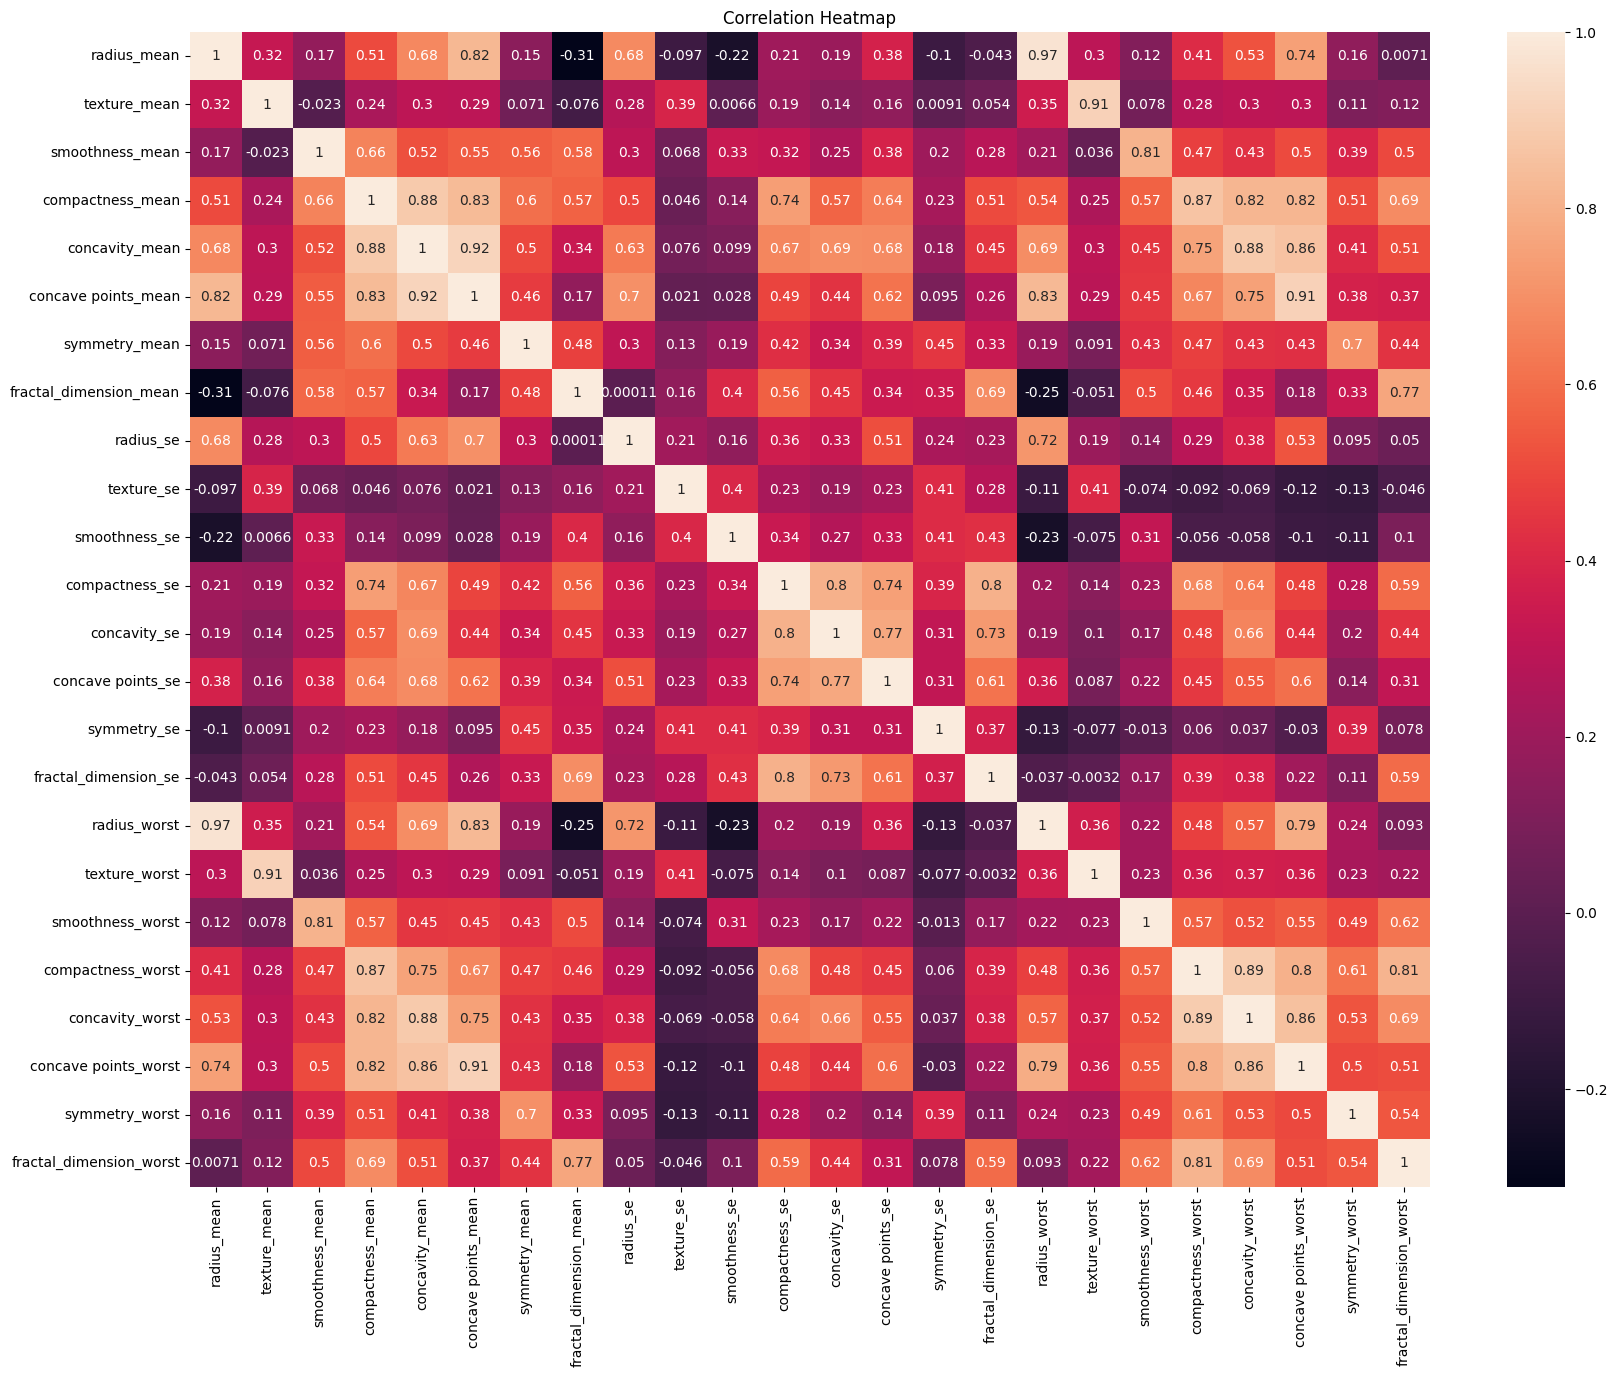

In [ ]:
import numpy as np
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlations
corr = numerical_df.corr()  # Exclude non-numerical columns
plt.figure(figsize=(20, 15))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
print(corr['radius_mean']['radius_worst'])
print(corr['texture_mean']['texture_worst'])
print(corr['smoothness_mean']['smoothness_worst'])
print(corr['compactness_mean']['compactness_worst'])
print(corr['concavity_mean']['concavity_worst'])
print(corr['concave points_mean']['concave points_worst'])
print(corr['symmetry_mean']['symmetry_worst'])

0.9695389726112055
0.912044588840421
0.8053241954943627
0.8658090398022629
0.8841026390943817
0.9101553142985918
0.6998257976437302


Most features have high positive correlations between their mean and worst values, suggesting consistency in feature behavior across different measurements.

Plot the relationship between each mean and worst

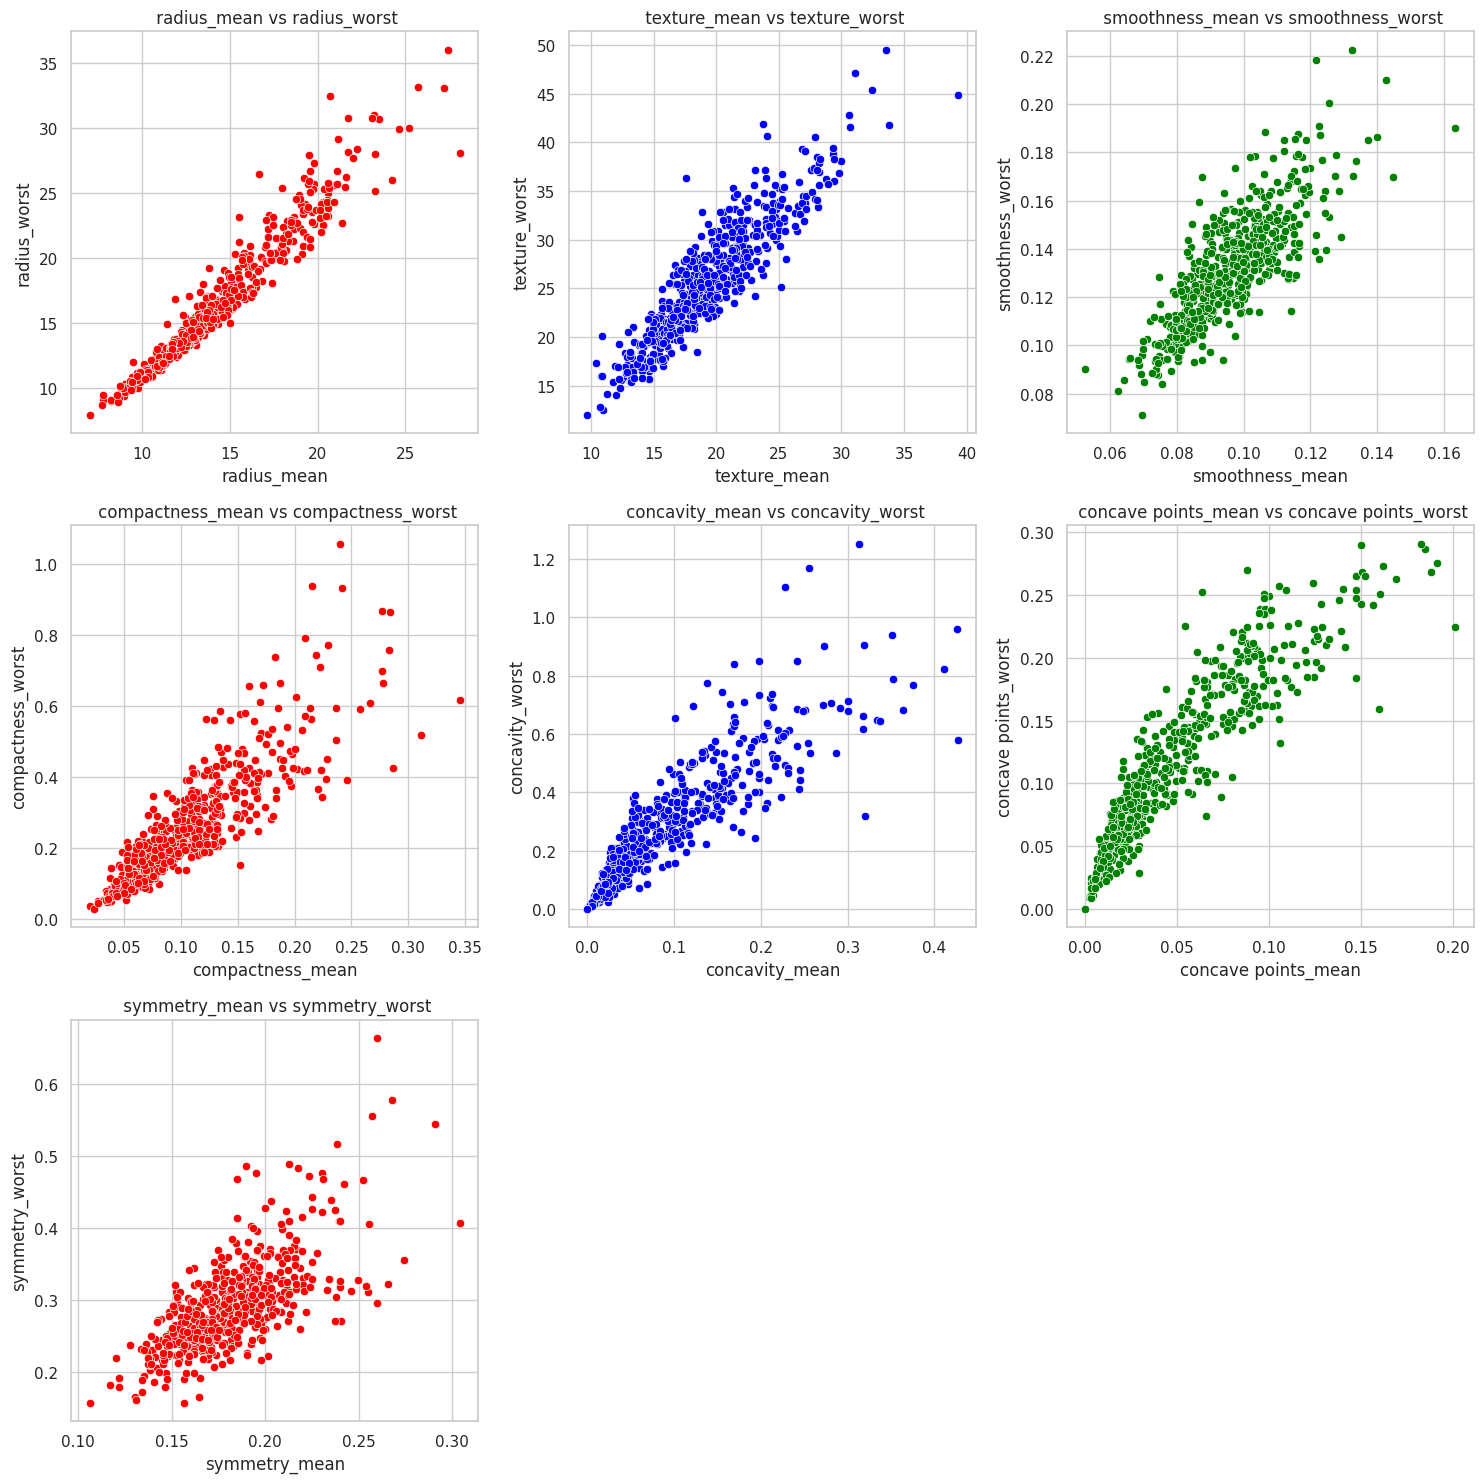

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# List of features for scatter plots
features = [
    ('radius_mean', 'radius_worst'),
    ('texture_mean', 'texture_worst'),
    ('smoothness_mean', 'smoothness_worst'),
    ('compactness_mean', 'compactness_worst'),
    ('concavity_mean', 'concavity_worst'),
    ('concave points_mean', 'concave points_worst'),
    ('symmetry_mean', 'symmetry_worst'),
]
colors = ['red', 'blue', 'green']

for i, (x_feature, y_feature) in enumerate(features):
    row, col = divmod(i, 3)
    sns.scatterplot(
        x=x_feature,
        y=y_feature,
        data=df,
        ax=axes[row, col],
        color=colors[i % len(colors)]  # Cycle through colors
    )
    axes[row, col].set_title(f' {x_feature} vs {y_feature}')
    axes[row, col].set_xlabel(x_feature)
    axes[row, col].set_ylabel(y_feature)

# Hide unused subplot (if any)
if len(features) < 9:
    for i in range(len(features), 9):
        row, col = divmod(i, 3)
        axes[row, col].axis('off')
plt.tight_layout()
plt.show()

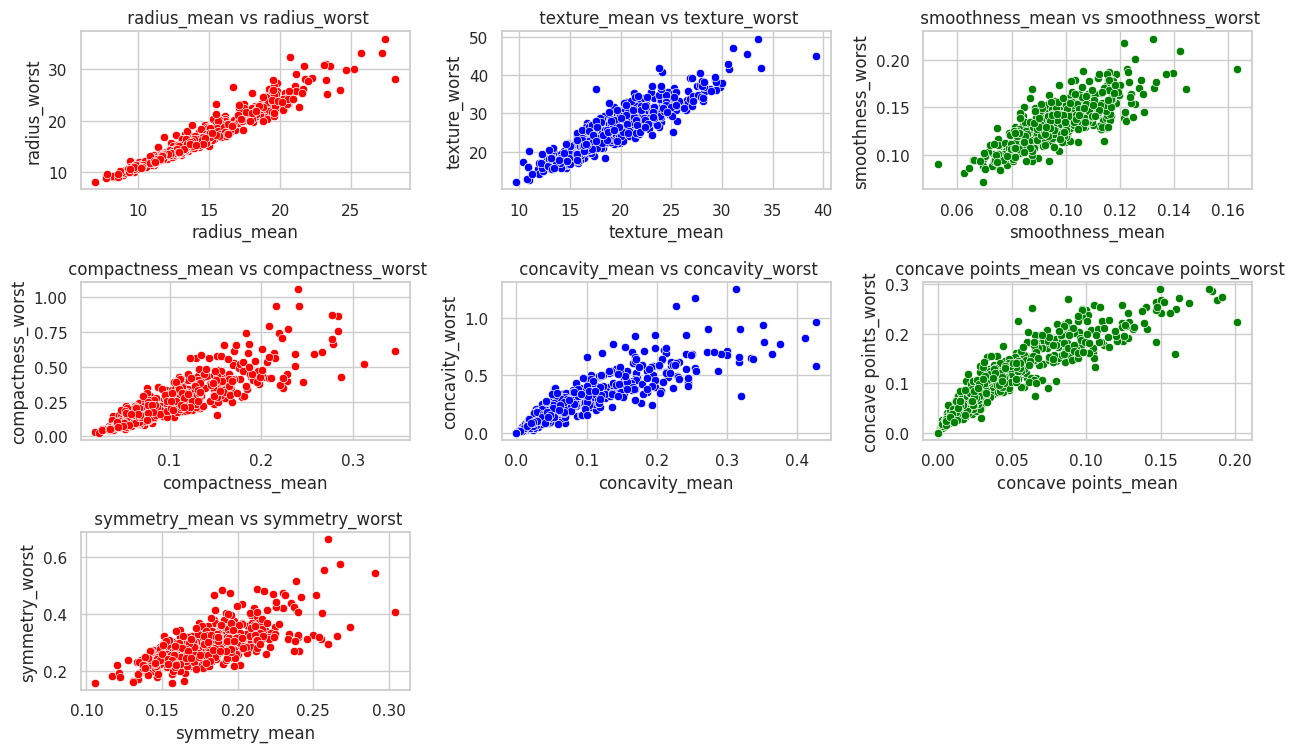

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Set figure size in inches (1280/100, 769/100)
fig, axes = plt.subplots(3, 3, figsize=(12.8, 7.69))

# List of features for scatter plots
features = [
    ('radius_mean', 'radius_worst'),
    ('texture_mean', 'texture_worst'),
    ('smoothness_mean', 'smoothness_worst'),
    ('compactness_mean', 'compactness_worst'),
    ('concavity_mean', 'concavity_worst'),
    ('concave points_mean', 'concave points_worst'),
    ('symmetry_mean', 'symmetry_worst'),
]
colors = ['red', 'blue', 'green']

for i, (x_feature, y_feature) in enumerate(features):
    row, col = divmod(i, 3)
    sns.scatterplot(
        x=x_feature,
        y=y_feature,
        data=df,
        ax=axes[row, col],
        color=colors[i % len(colors)]  # Cycle through colors
    )
    axes[row, col].set_title(f' {x_feature} vs {y_feature}')
    axes[row, col].set_xlabel(x_feature)
    axes[row, col].set_ylabel(y_feature)

# Hide unused subplot (if any)
if len(features) < 9:
    for i in range(len(features), 9):
        row, col = divmod(i, 3)
        axes[row, col].axis('off')

plt.tight_layout()

# Save the figure with exact 1280 x 769 px size
fig.savefig("scatterplots.png", dpi=100)  # 12.8 inches * 100 dpi = 1280 px, 7.69 inches * 100 dpi = 769 px

plt.show()


In [ ]:
df.drop(['radius_worst','concave points_mean','texture_worst','smoothness_worst','concavity_worst','compactness_mean'],axis=1,inplace=True)
df.shape

(569, 19)

In [ ]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

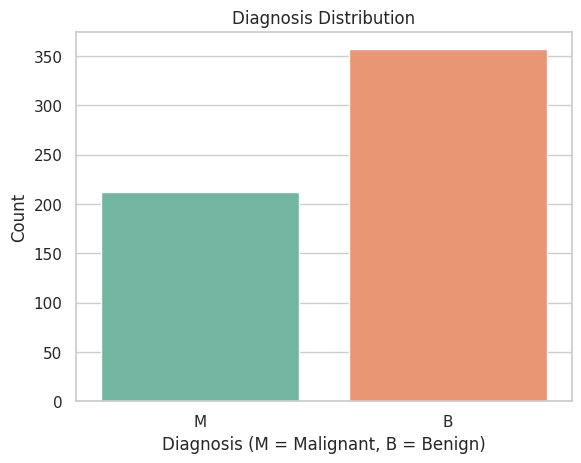

In [ ]:
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()

# Encoding Catagorical data

In [ ]:
df['diagnosis']=df['diagnosis'].map({'M': 0, 'B': 1})
df['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
x =df.drop(columns=['diagnosis'])
y=df['diagnosis']

# Balance Data

In [ ]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
x,y = resampler.fit_resample(x,y)

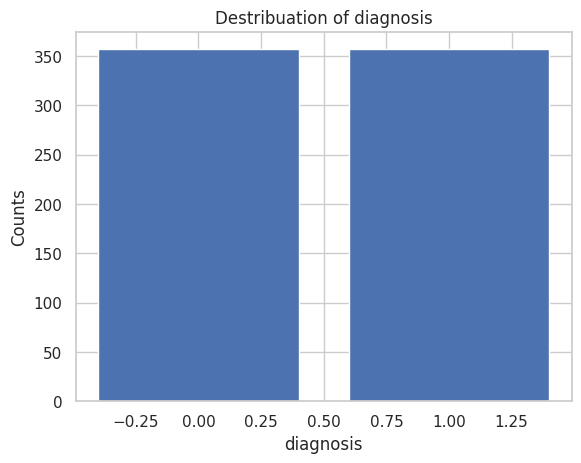

In [ ]:
counts=y.value_counts()
plt.bar(counts.index,counts.values)
plt.title('Destribuation of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Counts')
plt.show()

# Scaling Our data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

X_scaled = sc.fit_transform(x)

# Spliting data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(571, 18)
(571,)
(143, 18)
(143,)


# Evaluation Function

In [ ]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

In [ ]:
final_res =[]

# Modeling

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

# Train the model
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred_LR = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LR)
final_res.append(accuracy)

In [ ]:
evaluate_model(y_test,y_pred_LR)

Accuracy: 0.972027972027972
Precision: 0.9710144927536232
Recall: 0.9710144927536232
ROC AUC: 0.971993732863298


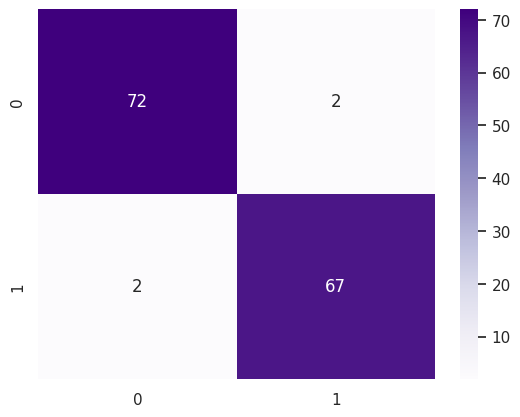

In [ ]:
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_RF = RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_RF)
final_res.append(accuracy)

In [ ]:
evaluate_model(y_test,y_pred_RF)

Accuracy: 0.958041958041958
Precision: 0.9701492537313433
Recall: 0.9420289855072463
ROC AUC: 0.9575009792401097


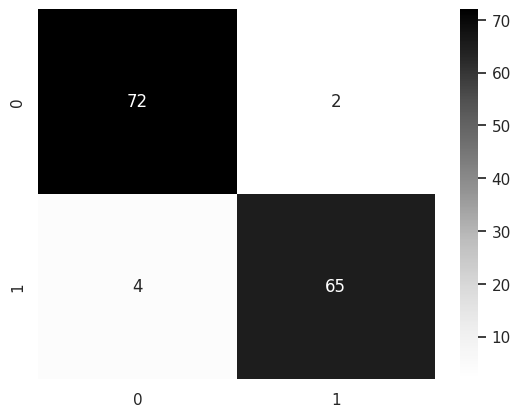

In [ ]:
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")
plt.show()

# Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
svm= SVC(random_state=42)

svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
final_res.append(accuracy)

In [ ]:
evaluate_model(y_test,y_pred_svm)

Accuracy: 0.972027972027972
Precision: 0.9850746268656716
Recall: 0.9565217391304348
ROC AUC: 0.9715041128084607


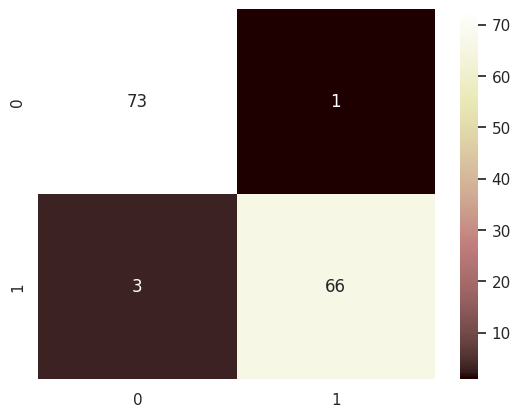

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="pink")
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_naive_bayes = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_naive_bayes)
final_res.append(accuracy)

In [ ]:
evaluate_model(y_test,y_pred_naive_bayes)

Accuracy: 0.9370629370629371
Precision: 0.9166666666666666
Recall: 0.9565217391304348
ROC AUC: 0.9377203290246768


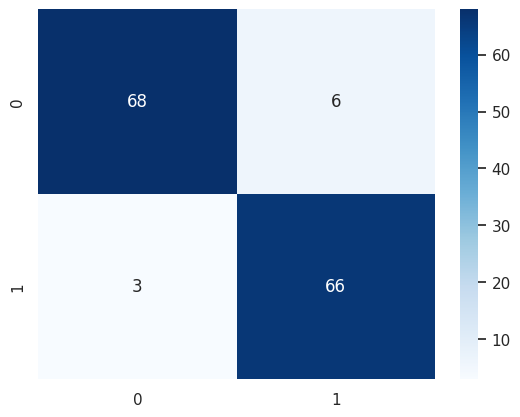

In [ ]:
cm = confusion_matrix(y_test, y_pred_naive_bayes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier(random_state=42)
ds.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_ds = ds.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_ds)
final_res.append(accuracy)

In [ ]:
evaluate_model(y_test,y_pred_ds)

Accuracy: 0.951048951048951
Precision: 0.984375
Recall: 0.9130434782608695
ROC AUC: 0.9497649823736781


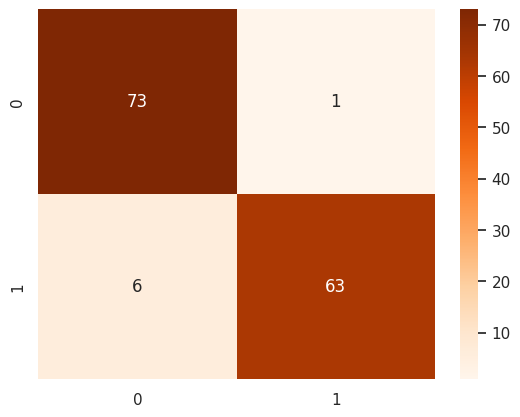

In [ ]:
cm = confusion_matrix(y_test, y_pred_ds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.show()

In [ ]:
final=np.array(final_res)
result=final.reshape(5,1)
columns=['Accuracy']
index=['Logistic Regression','Random Forest','SVM','Naive Bayes' ,'Decision Tree']
final_result=pd.DataFrame(result,index=index,columns=columns)

In [ ]:
final_result

,Accuracy
Logistic Regression,0.972028
Random Forest,0.958042
SVM,0.972028
Naive Bayes,0.937063
Decision Tree,0.951049
